In [1]:
import numpy as np
#manipulação dos dados
import pandas as pd 
from datetime import datetime
#configuração da pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
pd.set_option('max_colwidth', None)

#biblioteca para gráficos
import matplotlib.pyplot as plt

#biblioteca de visualizações estatísticas
import seaborn as sns

#resumo de Análise Exploratória dos dados
from pandas_profiling import ProfileReport
import sweetviz as sv

# Quebra dos dados em train /  test
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel

#Modelos de Classificação
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Validação Cruzada
from sklearn.model_selection import cross_val_score

#Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Tuning de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

#Serialização do Modelo
import pickle

c:\Users\leoni\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\leoni\AppData\Local\Temp\ipykernel_15640\3602423883.py:18: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# 1. Coleta, Tratamento e Limpeza dos Dados

In [2]:
df = pd.read_csv('melb_data.csv', sep = ',')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
df.isnull().sum()/len(df)

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

Car, BuildingArea, YearBuilt e CouncilArea possui dados vazios. Precisamos avaliar a importância de cada uma dessas variáveis

<Axes: >

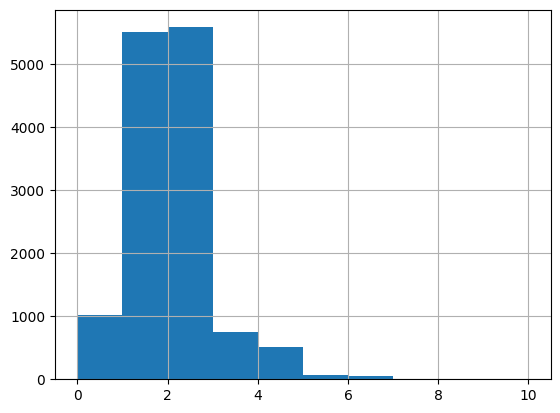

In [6]:
df['Car'].hist()

Em carros parece ser quantidade de carros, vamos atribuir 999 quando não temos essa informação.

In [7]:
df['Car'] = df['Car'].fillna(999)
df.isnull().sum()/len(df)

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.000000
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

BuildingArea tem 47% dos dados faltantes, YearBuilt tem 39% da base faltante. Apesar desses dados serem relevantes como falta muita informação eu poderia estar prevendo algo errado, por isso em primeira instância e de maneira rápida, vamos retira-los do modelo.

Poderiamos também usar ML para prever esses valores usando somente a base que tem essas infomações e depois completar o que estamos fazendo, mas precisamos ter cuidado com a propagação de erros.

In [8]:
df.drop(columns=['BuildingArea', 'YearBuilt'], inplace = True)

CouncilArea é categórica nominal, vamos substituir os NaN por unknown (Somente 10% da base)

In [9]:
df['CouncilArea'] = df['CouncilArea'].fillna('unknown')
df.isnull().sum()/len(df)

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

Nossa base já não tem dados faltantes, vamos ver a cardinalidade dos dados e remover as colunas que não serão interessantes para nossa análise.

In [10]:
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 12
Landsize          1448
CouncilArea         34
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

Vamos remover Address e Postcode por ser muito específico, SellerG por ser o nome do vendedor/corretor.
Vamos remover também as latitudes e longitudes pois já temos informações parecidas com a distância até o centro (Distance).


In [11]:
df.drop(columns = ['Address', 'SellerG', 'Postcode', 'Lattitude', 'Longtitude'], inplace = True)

In [12]:
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,4/03/2017,2.5,3.0,2.0,1.0,94.0,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,4/06/2016,2.5,3.0,1.0,2.0,120.0,Yarra,Northern Metropolitan,4019.0


# 2. Feature Engineering

Vou transformar a variável data em uma variável que me diz a quanto tempo aquela casa está a venda baseada no dia de hoje:

In [13]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
today = pd.Timestamp(datetime.now().date())
df['Date'] = (today - df['Date']).dt.days
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,2724,2.5,2.0,1.0,1.0,202.0,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,3027,2.5,2.0,1.0,0.0,156.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,2633,2.5,3.0,2.0,0.0,134.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,2633,2.5,3.0,2.0,1.0,94.0,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,2906,2.5,3.0,1.0,2.0,120.0,Yarra,Northern Metropolitan,4019.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Type           13580 non-null  object 
 3   Price          13580 non-null  float64
 4   Method         13580 non-null  object 
 5   Date           13580 non-null  int64  
 6   Distance       13580 non-null  float64
 7   Bedroom2       13580 non-null  float64
 8   Bathroom       13580 non-null  float64
 9   Car            13580 non-null  float64
 10  Landsize       13580 non-null  float64
 11  CouncilArea    13580 non-null  object 
 12  Regionname     13580 non-null  object 
 13  Propertycount  13580 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.5+ MB


In [15]:
df.describe()

,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,2667.149264,10.137776,2.914728,1.534242,6.163697,558.416127,7454.417378
std,0.955748,6.393107e+05,162.204983,5.868725,0.965921,0.691712,67.247719,3990.669241,4378.581772
min,1.000000,8.500000e+04,2430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,249.000000
25%,2.000000,6.500000e+05,2521.000000,6.100000,2.000000,1.000000,1.000000,177.000000,4380.000000
50%,3.000000,9.030000e+05,2633.000000,9.200000,3.000000,1.000000,2.000000,440.000000,6555.000000
75%,3.000000,1.330000e+06,2808.000000,13.000000,3.000000,2.000000,2.000000,651.000000,10331.000000
max,10.000000,9.000000e+06,3034.000000,48.100000,20.000000,8.000000,999.000000,433014.000000,21650.000000


# 3. Separar explicativas da Variável Resposta

In [16]:
var_resp = df['Price']
explicativas = df.drop(columns=['Price'])

In [17]:
var_resp.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [18]:
explicativas.head()

,Suburb,Rooms,Type,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,S,2724,2.5,2.0,1.0,1.0,202.0,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,S,3027,2.5,2.0,1.0,0.0,156.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3,h,SP,2633,2.5,3.0,2.0,0.0,134.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,h,PI,2633,2.5,3.0,2.0,1.0,94.0,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4,h,VB,2906,2.5,3.0,1.0,2.0,120.0,Yarra,Northern Metropolitan,4019.0


<Axes: ylabel='Price'>

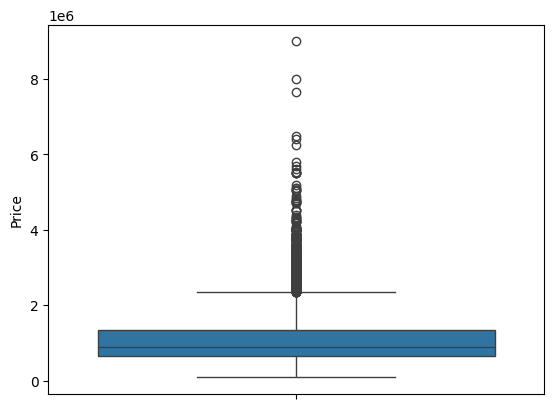

In [19]:
sns.boxplot(var_resp)

# 3. Construir nossa ABT

In [20]:
expl_cat = df[['Suburb', 'Type', 'Method','CouncilArea','Regionname']]
expl_num = df[['Rooms', 'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']]

In [21]:
expl_cat_encoding = pd.get_dummies(expl_cat, prefix_sep='_', columns=expl_cat.columns, drop_first=True, dtype='int')
expl_cat_encoding.head()

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb_New Gisborne,Suburb_Newport,Suburb_Niddrie,Suburb_Noble Park,Suburb_North Melbourne,Suburb_North Warrandyte,Suburb_Northcote,Suburb_Notting Hill,Suburb_Nunawading,Suburb_Oak Park,S

In [22]:
explicativas_tratadas = expl_num.merge(expl_cat_encoding, left_index=True, right_index=True)
explicativas_tratadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Columns: 367 entries, Rooms to Regionname_Western Victoria
dtypes: float64(6), int32(359), int64(2)
memory usage: 19.4 MB


# 4. Feature Selection

## 4.1 Seleção de Variáveis Categóricas

In [23]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(expl_cat_encoding, var_resp)
tree_selector = SelectFromModel(dt, max_features=8)
tree_selector.fit(expl_cat_encoding, var_resp)
tree_support = tree_selector.get_support()
tree_feature = expl_cat_encoding.loc[:, tree_support].columns.tolist()
tree_feature


['Type_t',
 'Type_u',
 'Method_S',
 'Method_SP',
 'CouncilArea_Glen Eira',
 'CouncilArea_Monash',
 'CouncilArea_Yarra',
 'Regionname_Southern Metropolitan']

## 4.2 Seleção de Variáveis Numéricas

In [24]:
rf = RandomForestRegressor(random_state=42)
rfe_selector = RFE(estimator = rf, n_features_to_select=5)
rfe_selector.fit(expl_num, var_resp)
rfe_support = rfe_selector.get_support()
rfe_feature = expl_num.loc[:, rfe_support].columns.tolist()
rfe_feature

['Rooms', 'Date', 'Distance', 'Landsize', 'Propertycount']

# 5. Base - ABT

In [25]:
expl_num_feature = expl_num[['Rooms', 'Distance', 'Landsize', 'Propertycount']]
expl_cat_feature = expl_cat[['Type','Method','CouncilArea', 'Regionname']]
expl_cat_feature =pd.get_dummies(expl_cat_feature, prefix_sep='_', columns = expl_cat_feature.columns, drop_first = True, dtype='int')
df_abt = expl_num.merge(expl_cat_feature, left_index=True, right_index=True)
df_abt.head()

,Rooms,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,CouncilArea_Kingston,CouncilArea_Knox,CouncilArea_Macedon Ranges,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Maroondah,CouncilArea_Melbourne,CouncilArea_Melton,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moorabool,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,CouncilArea_unknown,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2724,2.5,2.0,1.0,1.0,202.0,4019.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,3027,2.5,2.0,1.0,0.0,156.0,4019.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,3,2633,2.5,3.0,2.0,0.0,134.0,4019.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,3,2633,2.5,3.0,2.0,1.0,94.0,4019.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,4,2906,2.5,3.0,1.0,2.0,120.0,4019.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# 6. Separar em Treino e Teste

In [26]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df_abt, var_resp, test_size = 0.3, random_state = 42)

In [27]:
x_treino.shape

(9506, 54)

In [28]:
x_teste.shape

(4074, 54)

# 7. Treinamento dos Modelos

In [29]:
#instanciar os modelos novamente

tree = DecisionTreeRegressor(random_state = 42)
rf = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)

In [30]:
tree_cross = cross_val_score(estimator= tree,
                             X= x_treino,
                             y = y_treino,
                             cv=3,
                             scoring = make_scorer(mean_absolute_error)
                             )
tree_cross

array([252902.71378984, 263331.23382771, 251657.68686869])

In [31]:
tree.fit(x_treino, y_treino)
mae_tree_treino = mean_absolute_error(y_treino, tree.predict(x_treino))
mae_tree_treino

269.3772354302546

In [32]:
rf.fit(x_treino, y_treino)
mae_rf_treino = mean_absolute_error(y_treino, rf.predict(x_treino))
mae_rf_treino

67911.44640719813

In [33]:
gb.fit(x_treino, y_treino)
mae_gb_treino = mean_absolute_error(y_treino, gb.predict(x_treino))
mae_gb_treino

190166.68148228613

In [61]:
tree.fit(x_teste, y_teste)
mae_tree_teste = mean_absolute_error(y_teste, tree.predict(x_teste))
mae_tree_teste

TypeError: got an unexpected keyword argument 'greater_is_better'

In [35]:
rf.fit(x_teste, y_teste)
mae_rf_teste = mean_absolute_error(y_teste, rf.predict(x_teste))
mae_rf_teste

73150.82409261988

In [36]:
gb.fit(x_teste, y_teste)
mae_gb_teste = mean_absolute_error(y_teste, gb.predict(x_teste))
mae_gb_teste

189157.2561920337

In [37]:
#Resumo desses resultados
Resultado_mae = {
    'Método': ['Tree', 'Tree', 'RF', 'RF', 'GB', 'GB'],
    'Conjunto': ['Treino', 'Teste'] * 3,
    'MAE': [mae_tree_treino, mae_tree_teste, 
                 mae_rf_treino, mae_rf_teste,
                 mae_gb_treino, mae_gb_teste]
}
pd.DataFrame(Resultado_mae)

,Método,Conjunto,MAE
0,Tree,Treino,269.377235
1,Tree,Teste,15.341188
2,RF,Treino,67911.446407
3,RF,Teste,73150.824093
4,GB,Treino,190166.681482
5,GB,Teste,189157.256192


In [38]:
# Calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Calcular MAPE para o conjunto de treino e teste
mape_tree_treino = mean_absolute_percentage_error(y_treino, tree.predict(x_treino))
mape_tree_teste = mean_absolute_percentage_error(y_teste, tree.predict(x_teste))

mape_rf_treino = mean_absolute_percentage_error(y_treino, rf.predict(x_treino))
mape_rf_teste = mean_absolute_percentage_error(y_teste, rf.predict(x_teste))

mape_gb_treino = mean_absolute_percentage_error(y_treino, gb.predict(x_treino))
mape_gb_teste = mean_absolute_percentage_error(y_teste, gb.predict(x_teste))

# Resumo dos resultados em um DataFrame
Resultado_mape = {
    'Método': ['Tree', 'Tree', 'RF', 'RF', 'GB', 'GB'],
    'Conjunto': ['Treino', 'Teste', 'Treino', 'Teste', 'Treino', 'Teste'],
    'MAPE': [mape_tree_treino, mape_tree_teste, 
             mape_rf_treino, mape_rf_teste,
             mape_gb_treino, mape_gb_teste]
}
pd.DataFrame(Resultado_mape)

,Método,Conjunto,MAPE
0,Tree,Treino,24.755535
1,Tree,Teste,0.003960
2,RF,Treino,18.408898
3,RF,Teste,6.905209
4,GB,Treino,19.623826
5,GB,Teste,18.319842


# 8. Tuning de Hiperparâmetros

## 8.1 Random Forest  

In [62]:
#usando Random Forest

rf_grid_dict = {
  'n_estimators':[50,100,200,500],
  'bootstrap': [True, False],
  'random_state':[42]
}

rf_grid = GridSearchCV(rf, rf_grid_dict, cv=2, scoring = make_scorer(mean_absolute_error, greater_is_better=False))


In [63]:
rf_grid.fit(x_treino, y_treino)



GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [50, 100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'))

In [64]:
rf_grid.best_params_

{'bootstrap': True, 'n_estimators': 500, 'random_state': 42}

In [65]:
rf_grid.best_score_

-188865.31786675082

In [66]:
mape_rf_grid_treino = mean_absolute_percentage_error(y_treino, rf_grid.predict(x_treino))
mape_rf_grid_teste = mean_absolute_percentage_error(y_teste, rf_grid.predict(x_teste))

In [67]:
print(mape_rf_grid_treino)
print(mape_rf_grid_teste)

6.247322566108408
17.011541194444018


## 8.2 Gradiente Boosting

In [55]:
gb_grid_dict = {
  'max_depth':[1,3,8],
  'n_estimators':[10,20,100,200],
  'random_state':[42]
}
gb_grid = GridSearchCV(gb, gb_grid_dict, scoring=make_scorer(mean_absolute_error, greater_is_better=False), cv=2)

In [56]:
gb_grid.fit(x_treino, y_treino)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 8],
                         'n_estimators': [10, 20, 100, 200],
                         'random_state': [42]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'))

In [57]:
gb_grid.best_params_

{'max_depth': 8, 'n_estimators': 100, 'random_state': 42}

In [58]:
gb_grid.best_score_

-184480.08655561233

In [59]:
mape_gb_grid_treino = mean_absolute_percentage_error(y_treino, gb_grid.predict(x_treino))
mape_gb_grid_teste = mean_absolute_percentage_error(y_teste, gb_grid.predict(x_teste))

In [60]:
print(mape_gb_grid_treino)
print(mape_gb_grid_teste)

9.309341421107694
16.125809546738196


In [68]:
# Resumo dos resultados em um DataFrame
Resultados = {
    'Método': ['Tree', 'Tree', 'RF', 'RF', 'GB', 'GB', 'RF_Grid', 'RF_Grid', 'GB_Grid', 'GB_Grid'],
    'Conjunto': ['Treino', 'Teste', 'Treino', 'Teste', 'Treino', 'Teste', 'Treino', 'Teste', 'Treino', 'Teste'],
    'MAPE': [mape_tree_treino, mape_tree_teste, 
             mape_rf_treino, mape_rf_teste,
             mape_gb_treino, mape_gb_teste,
             mape_rf_grid_treino, mape_rf_grid_teste,
             mape_gb_grid_treino, mape_gb_grid_teste,]
}
pd.DataFrame(Resultados)

,Método,Conjunto,MAPE
0,Tree,Treino,24.755535
1,Tree,Teste,0.003960
2,RF,Treino,18.408898
3,RF,Teste,6.905209
4,GB,Treino,19.623826
5,GB,Teste,18.319842
6,RF_Grid,Treino,6.247323
7,RF_Grid,Teste,17.011541
8,GB_Grid,Treino,9.309341
9,GB_Grid,Teste,16.125810


Tree:

O modelo de árvore de decisão tem um MAPE extremamente baixo no conjunto de teste, mas muito alto no conjunto de treino. Isso sugere que o modelo pode estar superajustado aos dados de treino e não generaliza bem para novos dados.

RF (Random Forest):

O modelo Random Forest tem um MAPE moderadamente baixo nos dados de treino e um desempenho razoavelmente bom nos dados de teste, indicando um bom equilíbrio entre ajuste e generalização.

GB (Gradient Boosting):

O modelo Gradient Boosting tem MAPE semelhante nos conjuntos de treino e teste, o que sugere que o modelo está bem ajustado e generaliza bem, mas o erro ainda é relativamente alto.

RF_Grid (Random Forest com Grid Search):

O modelo Random Forest otimizado tem um MAPE muito baixo no conjunto de treino, mas um MAPE significativamente mais alto no conjunto de teste, sugerindo possível superajuste.

GB_Grid (Gradient Boosting com Grid Search):

O modelo Gradient Boosting otimizado apresenta um bom equilíbrio entre erro nos conjuntos de treino e teste, embora o erro no conjunto de teste seja relativamente alto.

Podemos escolher GB_Grid ou RF!!

Vou usar o GB_Grid, mas precisava de mais análises e melhores parâmetros para encontrar um modelo melhor

# 9. Serializar

In [73]:
with open('Modelo_regressor_MiniCurso.pkl', 'wb') as modelo:
  pickle.dump(gb_grid, modelo)

# 10. Usar o modelo

In [78]:
modelo = pickle.load(open('Modelo_regressor_MiniCurso.pkl', 'rb'))

In [79]:
precos = df_abt.head(10)

In [81]:
precos_modelo = pd.DataFrame(modelo.predict(precos))
precos_modelo

,0
0,1.270372e+06
1,1.017617e+06
2,1.352589e+06
3,1.334424e+06
4,1.515493e+06
5,1.073195e+06
6,1.656389e+06
7,1.242604e+06
8,4.172968e+05
9,1.218484e+06


In [91]:

verifica = pd.concat([df['Price'].head(10), precos_modelo.head(10)], axis=1)

verifica.columns = ['Price', 'Precos_Modelo']
verifica['Precos_Modelo'] = verifica['Precos_Modelo'].apply(lambda x: f'{x:.2f}')
verifica

,Price,Precos_Modelo
0,1480000.0,1270371.65
1,1035000.0,1017616.97
2,1465000.0,1352588.52
3,850000.0,1334423.78
4,1600000.0,1515493.27
5,941000.0,1073194.92
6,1876000.0,1656389.10
7,1636000.0,1242603.81
8,300000.0,417296.83
9,1097000.0,1218484.26


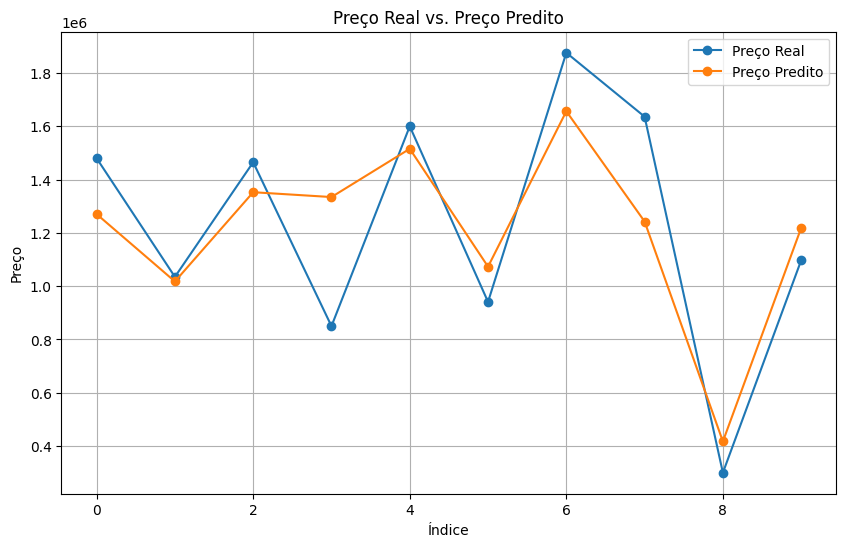

In [107]:
verifica['Precos_Modelo'] = verifica['Precos_Modelo'].astype(float)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(verifica.index, verifica['Price'], label='Preço Real', marker='o')
plt.plot(verifica.index, verifica['Precos_Modelo'], label='Preço Predito', marker='o')
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.title('Preço Real vs. Preço Predito')
plt.legend()
plt.grid(True)
plt.show()
